In [1]:
import json
import pandas as pd

In [3]:
data = open('index.json').read()
data = json.loads(data)

In [4]:
data = pd.DataFrame(data)

In [11]:
data['files'][0][0]['path']

u'full/ac365bf80a6d954765ff90bf699c3cb78a3b7d3c.jpg'

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [155]:
from colorthief import ColorThief
index = 0

color_thief = ColorThief(data['files'][index][0]['path'])
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

#dcc172


(0.0, 1.0, 0.0, 1.0)

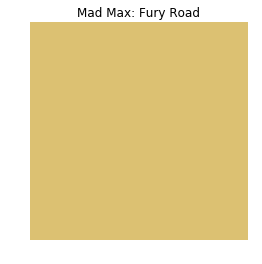

In [156]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        1,          # width
        1,          # height
        facecolor='#%02x%02x%02x' % dominant_color
        
    )
)
print('#%02x%02x%02x' % dominant_color)
plt.title(data['title'][index])
plt.axis('off')

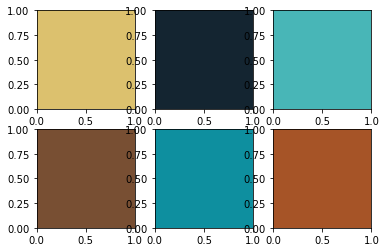

In [157]:
fig, axes  = plt.subplots(2,3)
for i, ax in enumerate(axes.flat):
    ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        1,          # width
        1,          # height
        facecolor='#%02x%02x%02x' % palette[i]
    )
    
)

(-0.5, 149.5, 224.5, -0.5)

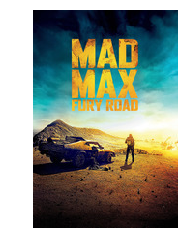

In [158]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(data['files'][index][0]['path']))
plt.axis('off')

In [152]:
data.head()

,data_id,file_urls,files,title
0,62780,[https://a.ltrbxd.com/resized/film-poster/6/2/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Mad Max: Fury Road
1,171384,[https://a.ltrbxd.com/resized/sm/upload/cl/dn/...,[{u'url': u'https://a.ltrbxd.com/resized/sm/up...,Whiplash
2,107418,[https://a.ltrbxd.com/resized/film-poster/1/0/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Star Wars: The Force Awakens
3,240344,[https://a.ltrbxd.com/resized/sm/upload/ki/6p/...,[{u'url': u'https://a.ltrbxd.com/resized/sm/up...,La La Land
4,149857,[https://a.ltrbxd.com/resized/film-poster/1/4/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Gone Girl


In [154]:
data['files'][1][0]

{u'checksum': u'd0560bd10d767b9f44184470118ac2be',
 u'path': u'full/6f118fdf2942a1e2915d12d514dcd76d7d6ab22e.jpg',
 u'url': u'https://a.ltrbxd.com/resized/sm/upload/cl/dn/kr/f1/4C9LHDxMsoYI0S3iMPZdm3Oevwo-0-150-0-225-crop.jpg'}

In [174]:
dominant_color = []
palette = []
for row in data['files']:
    ct = ColorThief(row[0]['path'])
    dominant_color.append(ct.get_color(quality=1))
    palette.append(ct.get_palette(color_count=6))

In [176]:
data['dominant_color'] = dominant_color
data['palette'] = palette

In [177]:
data.head()

,data_id,file_urls,files,title,dominant_color,palette
0,62780,[https://a.ltrbxd.com/resized/film-poster/6/2/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Mad Max: Fury Road,"(220, 193, 114)","[(220, 193, 110), (20, 37, 49), (72, 182, 183)..."
1,171384,[https://a.ltrbxd.com/resized/sm/upload/cl/dn/...,[{u'url': u'https://a.ltrbxd.com/resized/sm/up...,Whiplash,"(10, 11, 11)","[(6, 7, 7), (188, 190, 187), (92, 98, 96), (12..."
2,107418,[https://a.ltrbxd.com/resized/film-poster/1/0/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Star Wars: The Force Awakens,"(211, 137, 109)","[(30, 16, 23), (217, 158, 125), (87, 94, 178),..."
3,240344,[https://a.ltrbxd.com/resized/sm/upload/ki/6p/...,[{u'url': u'https://a.ltrbxd.com/resized/sm/up...,La La Land,"(14, 11, 59)","[(13, 10, 59), (73, 29, 183), (189, 170, 121),..."
4,149857,[https://a.ltrbxd.com/resized/film-poster/1/4/...,[{u'url': u'https://a.ltrbxd.com/resized/film-...,Gone Girl,"(95, 100, 101)","[(101, 105, 104), (175, 175, 172), (22, 37, 51..."
